# BERT sentence grammar classification

##Data exploration

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data.csv", sep = ';', encoding = 'latin1', names = ["sentence", "labels"])
df.head()

,sentence,labels
0,"Our friends won't buy this analysis, let alone...",1
1,One more pseudo generalization and I'm giving up.,1
2,One more pseudo generalization or I'm giving up.,1
3,"The more we study verbs, the crazier they get.",1
4,Day by day the facts are getting murkier.,1


In [ ]:
df.info()  # We have 0 non-null values, which saves us time to replace null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8551 entries, 0 to 8550
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  8551 non-null   object
 1   labels    8551 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.7+ KB


In [ ]:
column_length = df['sentence'].apply(lambda x: len(x.split()))
print("Maximum sentence length:", column_length.max())         # There are very short and long sentences in the dataset
print("Minimum sentence length:", column_length.min())

Maximum sentence length: 42
Minimum sentence length: 2


### Label 0 means that the sentence is grammatically correct and 1 otherwise

In [ ]:
df.groupby('labels').describe()

sentence                                                               
          count unique                                                top freq
labels                                                                        
0          2528   2527                           Jennifer craned her arm.    2
1          6023   6016  Smith loaned, and his widow later donated, a v...    2

#### Sentence length distribution

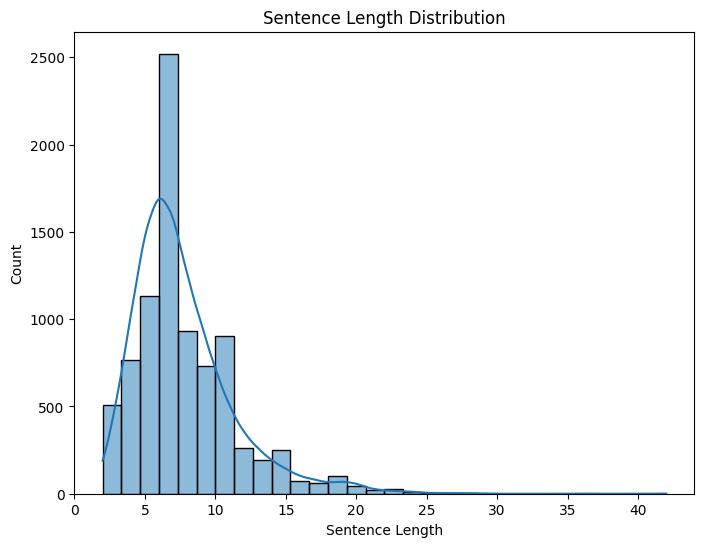

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(column_length, bins=30, kde=True)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.show()

####Class distribution

In [ ]:
df['labels'] = df['labels'].replace({1: 'Incorrect', 0: 'Correct'})

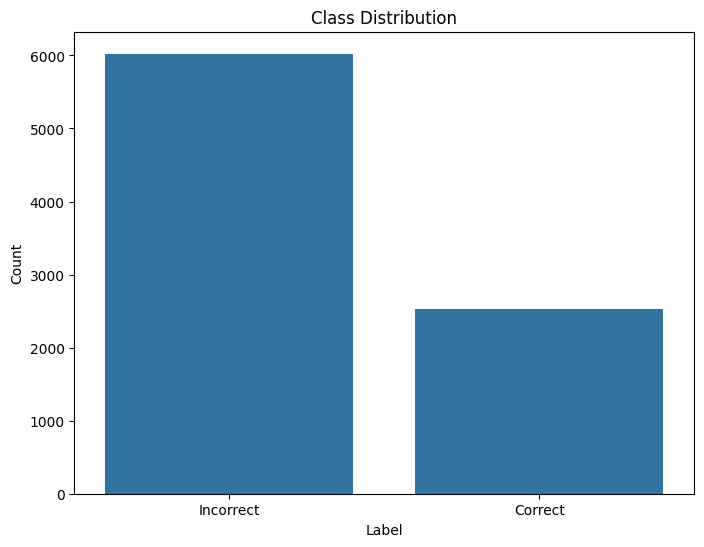

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='labels', data = df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#### I conclude that grammatically correct sentences are about **29.5%** of the dataset, which isn't good since it indicates **class imbalance**, and the model could go astray and yields bad predictions or False Positives and False Negatives, since we will want also to predict correct sentences. Models bias heavily toward the majority class, overlooking minority examples critical to many use cases. Thus, we will either oversample or undersample the dataset, so as to get a better performance. My opinion is to undergo an oversampling of the data, because of these reasons:


* ####   Undersampling involves reducing the size of the data, resulting in a **loss of information**. Therefore, the model may lean towards the **majority class** and train well to predict it, neglecting the minority class. Consequently, the model may not generalize effectively, thus failing to achieve its objective.

* ####   Back in the day, during the 1980s and 1990s, neural network models already existed, but two main issues hindered their progress: **the poor quantity of data and the limitations of computing power**. Models weren't optimized for machines, and their performance only improved with the onset of digital transformation. Consequently, models are becoming increasingly effective due to the abundance of data; thus, the more data available, the better the results. ~ ***Andrew Ng***



* ####   Moreover, given the large size of deep learning models, **the more data we have, the lower the risk of overfitting**.



* ####   I emphasize that **synthetic data remains beneficial as it is based on reality and generates data very close to reality**, making it indistinguishable from real data. This assists the model in **generalizing** very well, especially when dealing with Big Data, utilizing techniques like GANs and modern diffusion models.
